In [11]:
from transformers import AutoModel, AutoTokenizer

checkpoint = "Salesforce/codet5p-110m-embedding"
device = "cpu"  # for GPU usage or "cpu" for CPU usage

tokenizer = AutoTokenizer.from_pretrained(checkpoint, trust_remote_code=True)
model = AutoModel.from_pretrained(checkpoint, trust_remote_code=True).to(device)

In [12]:
tokenizer.sep_token

'</s>'

In [3]:
tokenizer.convert_tokens_to_ids('</s>')

2

In [4]:
tokenizer.convert_ids_to_tokens(2)

'</s>'

In [2]:
import pandas as pd
df = pd.read_csv('../data/camel_data4.csv', header=0)

In [44]:
code = df.iloc[0]['snippet']

In [3]:
tokens = tokenizer.encode(code, return_tensors="pt").to(device)

NameError: name 'code' is not defined

In [23]:
for index, row in df.iterrows():
    print(len(tokenizer.encode(row['snippet'])))
    break

192


In [4]:
token_len = []


[token_len.append(len(tokenizer.encode(row['snippet']))) for index, row in df.iterrows()]  

Token indices sequence length is longer than the specified maximum sequence length for this model (702 > 512). Running this sequence through the model will result in indexing errors


KeyboardInterrupt: 

In [64]:
max(token_len)

8710

In [9]:
count_512_or_less = sum(1 for length in token_len if length <= 512)
total_count = len(token_len)
proportion_512_or_less = count_512_or_less / total_count

print(f'512トークン以下の割合: {proportion_512_or_less:.2f}')

512トークン以下の割合: 0.71


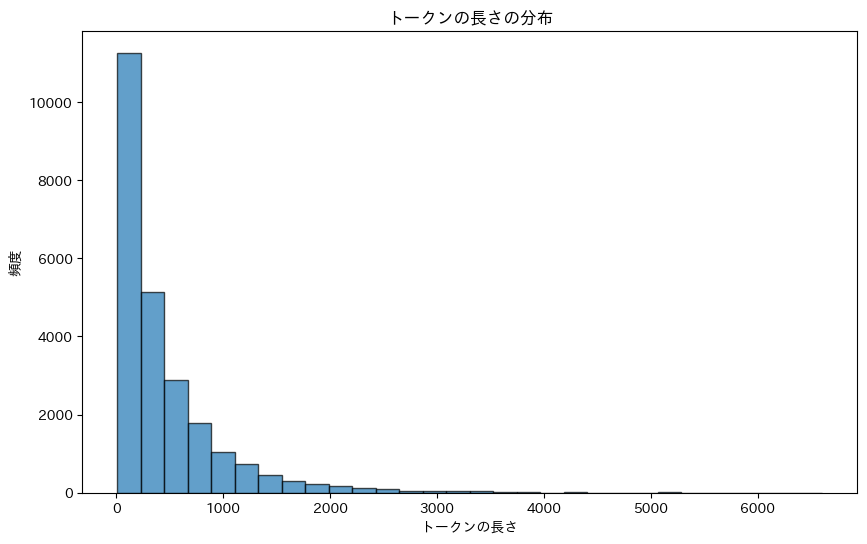

In [10]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(10, 6))
plt.hist(token_len, bins=30, edgecolor='k', alpha=0.7)
plt.title('トークンの長さの分布')
plt.xlabel('トークンの長さ')
plt.ylabel('頻度')
plt.show()

In [52]:
tokens.size()[1]

192

In [53]:
tokenizer.convert_ids_to_tokens(tokens)

ValueError: only one element tensors can be converted to Python scalars

In [5]:
embedding = model(tokens)[0]
print(f'Dimension of the embedding: {embedding.size()[0]}, with norm={embedding.norm().item()}')
# Dimension of the embedding: 256, with norm=1.0
print(embedding)

NameError: name 'tokens' is not defined

In [6]:
df.head()

,commit_id,snippet,ast,is_defect,kinds
0,a4701ac4bf5b50810914796e284b0e3f78a240bc,public static <E> Predicate<E> and(final Predi...,"(method_declaration(modifiers(public, public)(...",True,train
1,a4701ac4bf5b50810914796e284b0e3f78a240bc,public ProcessorBuilder<E> to(Endpoint<E> endp...,"(method_declaration(modifiers(public, public))...",True,train
2,a4701ac4bf5b50810914796e284b0e3f78a240bc,public Predicate<E> getPredicate() {\n ...,"(method_declaration(modifiers(public, public))...",True,train
3,a4701ac4bf5b50810914796e284b0e3f78a240bc,public Predicate<E> headerEquals(final String ...,"(method_declaration(modifiers(public, public))...",True,train
4,0a0bad2c4a35be88f7732def261a03737fab662e,public DestinationBuilder<E> otherwise() {\n ...,"(method_declaration(modifiers(public, public))...",True,train


In [7]:
# Calculate token lengths and store them in a new column
df['token_len'] = df['snippet'].apply(lambda x: len(tokenizer.encode(x)))


# Filter the DataFrame to keep only records where token length is 512 or less
df_filtered = df[df['token_len'] <= 512]

# Display the filtered DataFrame
print(df_filtered)

RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 516096 bytes.

In [38]:
df_filtered.head()

,commit_id,snippet,ast,is_defect,kinds,token_len
0,a4701ac4bf5b50810914796e284b0e3f78a240bc,public static <E> Predicate<E> and(final Predi...,"(method_declaration(modifiers(public, public)(...",True,train,192
1,a4701ac4bf5b50810914796e284b0e3f78a240bc,public ProcessorBuilder<E> to(Endpoint<E> endp...,"(method_declaration(modifiers(public, public))...",True,train,117
2,a4701ac4bf5b50810914796e284b0e3f78a240bc,public Predicate<E> getPredicate() {\n ...,"(method_declaration(modifiers(public, public))...",True,train,38
3,a4701ac4bf5b50810914796e284b0e3f78a240bc,public Predicate<E> headerEquals(final String ...,"(method_declaration(modifiers(public, public))...",True,train,161
4,0a0bad2c4a35be88f7732def261a03737fab662e,public DestinationBuilder<E> otherwise() {\n ...,"(method_declaration(modifiers(public, public))...",True,train,65


In [68]:

df_filtered = df_filtered.drop(columns=['token_len'])

df_filtered.to_csv('camel_filtered_data4.csv', index=False)